# moving the detector off-axis  -- how LE can we get?

In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import numpy as np
import vegas as vg
import os 

import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from matplotlib.pyplot import *
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.colors as colors

import nuflux

## generating muon decays

In [31]:
def move_off_axis(theta):
    
    nustorm1 = nuflux.fluxMC.MuonDecay()
    _ = nustorm1.simulate_decays(
                                Rpm=0.5,
                                pmin=0.110,
                                pmax=5.0,
                                )
    _ = nustorm1.propagate_to_detector(
                                ZBEAMEND=250e2, # cm
                                ZBEAMEXIT=0, # cm
                                R_ND=[50e2*np.sin(theta),0,250e2+50e2*np.cos(theta)], # cm
                                )
    _ = nustorm1.flux_in_detector(NBINS=20)
    
    return nustorm1

In [32]:
xtheta = np.array([0,0.05,0.1,0.2])
nustorms = [move_off_axis(xtheta[i]) for i in range(4)]

Detector acceptance: 0.3751733784547868  for nue, and 0.3735991410107264 for numu.
Detector acceptance: 0.2837203743715024  for nue, and 0.2824432780767097 for numu.
Detector acceptance: 0.10923390782431333  for nue, and 0.10917377074138071 for numu.
Detector acceptance: 0.01860139251499462  for nue, and 0.019052929371258635 for numu.


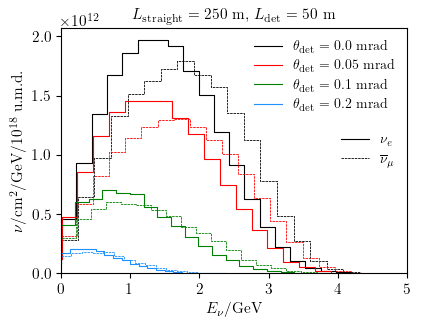

In [33]:
fsize=11
rc('text', usetex=True)
params={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
                'figure.figsize':(1.2*3.7,1.4*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
rcParams.update(params)
axes_form  = [0.15,0.15,0.78,0.74]

fig = plt.figure()
ax = fig.add_axes(axes_form)

colors = ['black','red','green','dodgerblue']
for i in range(4):
    ax.step(nustorms[i].Enue_ND,nustorms[i].flux_nue_ND,
            label=fr'$\theta_{{\rm det}}={xtheta[i]}$ mrad',color=colors[i],lw=0.8)
    ax.step(nustorms[i].Enumu_ND,nustorms[i].flux_numu_ND,
            color=colors[i],dashes=(3,1),lw=0.6)
#     ax.plot(nustorms[i].Enumu_ND,nustorms[i].flux_numu_ND,label=r'$\overline{\nu}_\mu$',color=colors[i])


ax.set_xlim(0,5)
ax.set_ylabel(r'$\nu$/cm$^2$/GeV/$10^{18}$ u.m.d.')
ax.set_xlabel(r'$E_{\nu}/$GeV')


legend = ax.legend(frameon=False,loc='upper right')
l1, = ax.plot([],[],label=r'$\nu_e$',color='black',lw=0.8)
l2, = ax.plot([],[],label=r'$\overline{\nu}_\mu$',color='black',dashes=(3,1),lw=0.6)
legend2 = ax.legend(handles=[l1,l2], frameon=False,loc='center right')
plt.gca().add_artist(legend)

ax.set_title(r'$L_{\rm straight} = 250$~m, $L_{\rm det} = 50$~m',fontsize=fsize)
# ax.set_yscale('log'),
ax.set_ylim(0,)
fig.savefig('plots/nu_fluxes_offaxis.png', dpi=300, bbox_inches='tight')

## Varying muon energy

In [34]:
def configure_E_theta(E,theta):
    
    nustorm1 = nuflux.fluxMC.MuonDecay()
    _ = nustorm1.simulate_decays(
                                Rpm=0.5,
                                pmin=0,
                                pmax=10.0,
                                beam_p0=E,
                                )
    _ = nustorm1.propagate_to_detector(
                                ZBEAMEND=250e2, # cm
                                ZBEAMEXIT=0, # cm
                                R_ND=[50e2*np.sin(theta),0,250e2+50e2*np.cos(theta)], # cm
                                )
    _ = nustorm1.flux_in_detector(NBINS=20)
    
    return nustorm1

In [35]:
xtheta = np.array([0,0.0,0.0])
xE = np.array([3.8,5.0,7.0])
nustorms = [configure_E_theta(xE[i],xtheta[i]) for i in range(3)]

Detector acceptance: 0.37415534722792604  for nue, and 0.3748676610340761 for numu.
Detector acceptance: 0.47933299391012146  for nue, and 0.4791202429598629 for numu.
Detector acceptance: 0.610331561056535  for nue, and 0.6110635430959215 for numu.


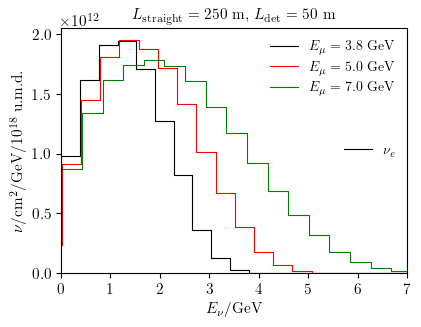

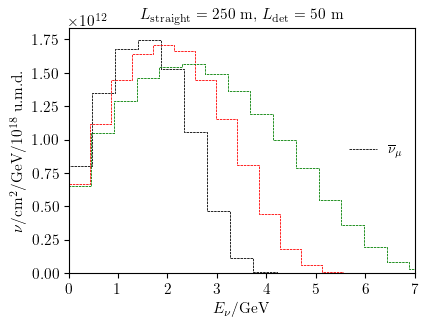

In [36]:
fsize=11
rc('text', usetex=True)
params={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
                'figure.figsize':(1.2*3.7,1.4*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
rcParams.update(params)
axes_form  = [0.15,0.15,0.78,0.74]

fig = plt.figure()
fig2 = plt.figure()
ax = fig.add_axes(axes_form)
ax2 = fig2.add_axes(axes_form)

colors = ['black','red','green','dodgerblue']
for i in range(3):
    ax.step(nustorms[i].Enue_ND,nustorms[i].flux_nue_ND,
            label=fr'$E_\mu = {xE[i]}$~GeV',color=colors[i],lw=0.8)
    ax2.step(nustorms[i].Enumu_ND,nustorms[i].flux_numu_ND,
            color=colors[i],dashes=(3,1),lw=0.6)
#     ax.plot(nustorms[i].Enumu_ND,nustorms[i].flux_numu_ND,label=r'$\overline{\nu}_\mu$',color=colors[i])


ax.set_xlim(0,7)
ax.set_ylabel(r'$\nu$/cm$^2$/GeV/$10^{18}$ u.m.d.')
ax.set_xlabel(r'$E_{\nu}/$GeV')

ax2.set_xlim(0,7)
ax2.set_ylabel(r'$\nu$/cm$^2$/GeV/$10^{18}$ u.m.d.')
ax2.set_xlabel(r'$E_{\nu}/$GeV')


legend = ax.legend(frameon=False,loc='upper right')
# legend = ax2.legend(frameon=False,loc='upper right')
l1, = ax.plot([],[],label=r'$\nu_e$',color='black',lw=0.8)
l2, = ax2.plot([],[],label=r'$\overline{\nu}_\mu$',color='black',dashes=(3,1),lw=0.6)
legend1 = ax.legend(handles=[l1], frameon=False,loc='center right')
legend2 = ax2.legend(handles=[l2], frameon=False,loc='center right')
fig.gca().add_artist(legend)

ax.set_title(r'$L_{\rm straight} = 250$~m, $L_{\rm det} = 50$~m',fontsize=fsize)
ax2.set_title(r'$L_{\rm straight} = 250$~m, $L_{\rm det} = 50$~m',fontsize=fsize)
# ax.set_yscale('log'),
ax.set_ylim(0,)
ax2.set_ylim(0,)

fig.savefig('plots/nu_fluxes_emu_nue.png', dpi=300, bbox_inches='tight')
fig2.savefig('plots/nu_fluxes_emu_numu.png', dpi=300, bbox_inches='tight')